# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission, if necessary. Sections that begin with **'Implementation'** in the header indicate where you should begin your implementation for your project. Note that some sections of implementation are optional, and will be marked with **'Optional'** in the header.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data

training_file = 'data/train.p'
testing_file = 'data/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 2D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below.

In [2]:
### Replace each question mark with the appropriate value.

# TODO: Number of training examples
n_train = len(X_train)

# TODO: Number of testing examples.
n_test = len(X_test)

# TODO: What's the shape of an traffic sign image?
image_shape = train['sizes'][0]

# TODO: How many unique classes/labels there are in the dataset.
labels = list(set(y_train))
n_classes = len(labels)

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 39209
Number of testing examples = 12630
Image data shape = [29 30]
Number of classes = 43


Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

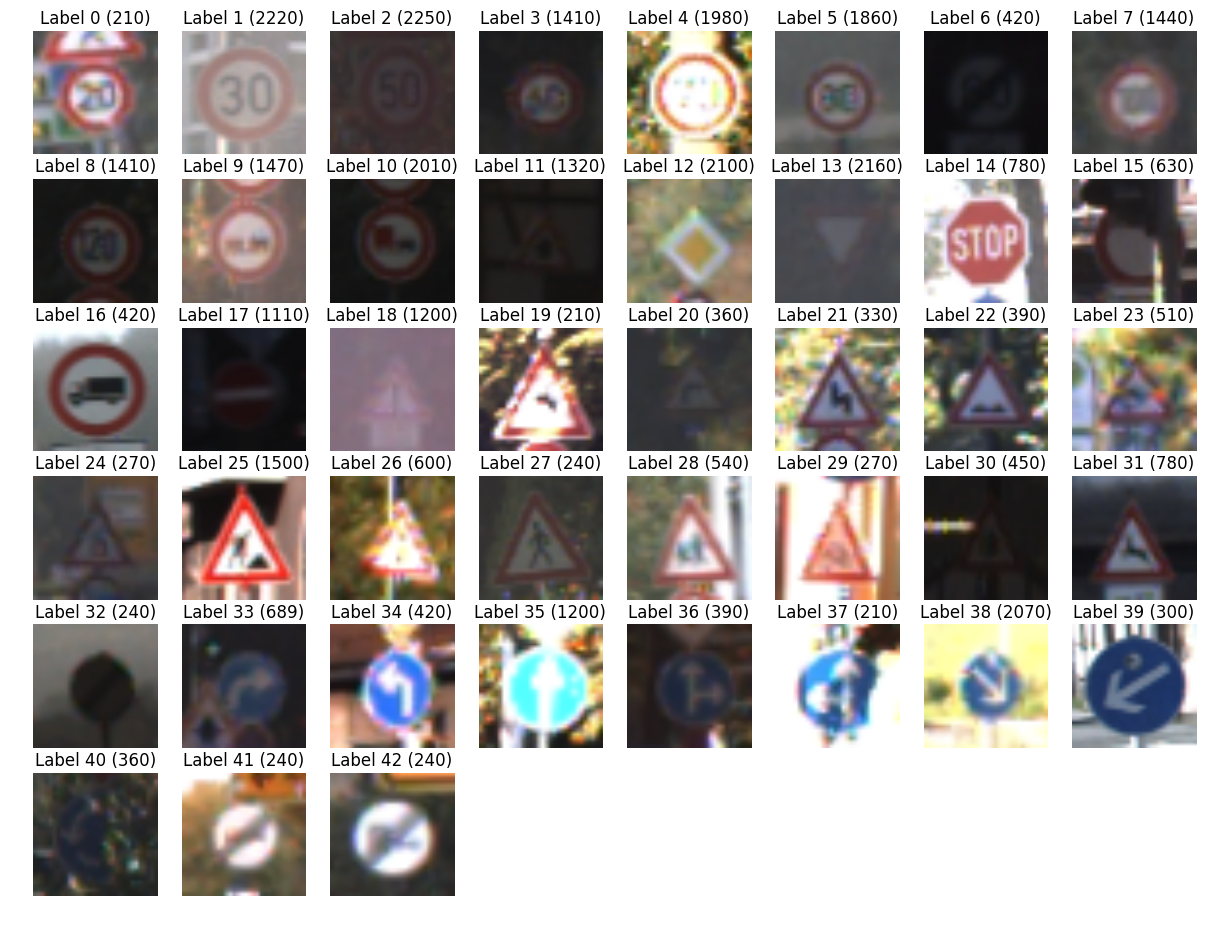

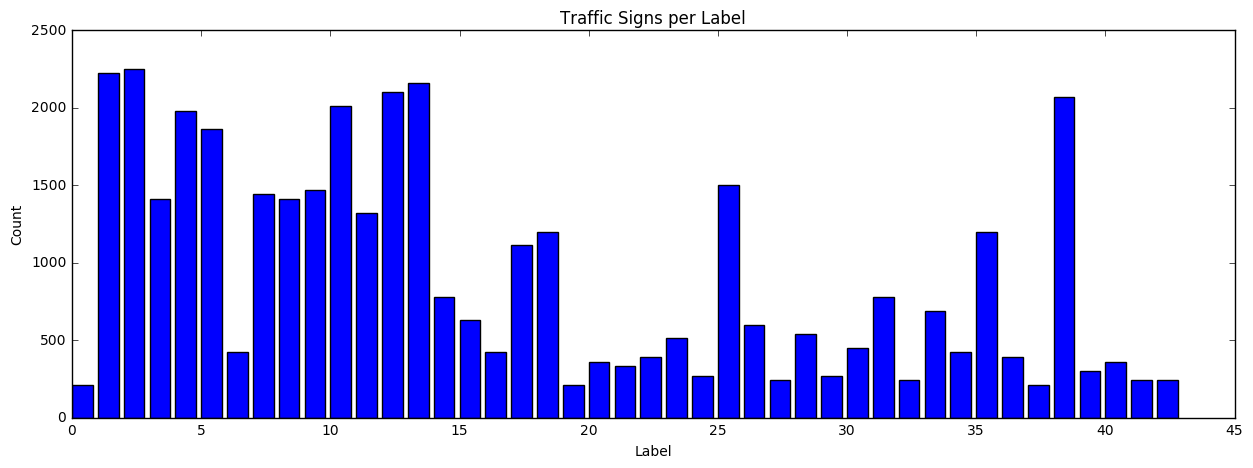

In [3]:
### Data exploration visualization goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline

import numpy as np
import skimage.transform

# Plot traffic sign images
# Taken from https://github.com/waleedka/traffic-signs-tensorflow/blob/master/notebook1.ipynb
plt.figure(1, figsize=(15, 15))
subplot_num = 1
sign_counts = []
for label in labels:
    # Pick the first image for each label
    i = np.nonzero(y_train == label)[0][0]
    image = X_train[i]
    plt.subplot(8, 8, subplot_num)
    plt.axis('off')
    count = np.count_nonzero(y_train == label)
    sign_counts.append(count)
    plt.title("Label {0} ({1})".format(label, count))
    subplot_num += 1
    plt.imshow(image)
plt.show()

# Plot the count of each sign
plt.figure(2, figsize=(15, 5))
plt.bar(labels, sign_counts, color='blue')
plt.title('Traffic Signs per Label')
plt.ylabel('Count')
plt.xlabel('Label')
plt.show()

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Neural network architecture
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

**NOTE:** The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play!

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [4]:
### Preprocess the data here.
### Feel free to use as many code cells as needed.

import skimage.color
import sklearn.preprocessing
import numpy as np
from sklearn.utils import shuffle

# Preprocessing
def preprocess(images):
    ret = []
    for image in images:
        # Convert to grayscale
        image = skimage.color.rgb2gray(image)
        # Scale
        image = sklearn.preprocessing.minmax_scale(image, feature_range=(0, 1))
        # Convert back to RGB
        image = skimage.color.gray2rgb(image)
        
        ret.append(image)
    return np.array(ret)

### Question 1 

_Describe how you preprocessed the data. Why did you choose that technique?_

**Answer:**

First, I converted each image from RGB to grayscale. This reduces the input shape, thus reducing the training time.

Then, I normalized the image data (by scaling each feature to the range 0-1) to improve training time and reduce the chances of getting stuck in local optima.

Upon testing, the network performs better with color images (without using this preprocessing).

In [5]:
### Generate data additional data (OPTIONAL!)
### and split the data into training/validation/testing sets here.
### Feel free to use as many code cells as needed.

import pickle
from sklearn.utils import shuffle

training_file = 'data/train.p'
testing_file = 'data/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)

# Use 3000 examples of training data as validation data
validation_size = 3000

# Shuffle the training data before separating
train['features'], train['labels'] = shuffle(train['features'], train['labels'])

X_train, y_train = train['features'][0:validation_size], train['labels'][0:validation_size]
X_validation, y_validation = train['features'][validation_size:], train['labels'][validation_size:]
X_test, y_test = test['features'], test['labels']

assert(len(X_train) == len(y_train))
assert(len(X_validation) == len(y_validation))
assert(len(X_test) == len(y_test))

print()
print("Image Shape: {}".format(X_train[0].shape))
print()
print("Training Set:   {} samples".format(len(X_train)))
print("Validation Set: {} samples".format(len(X_validation)))
print("Test Set:       {} samples".format(len(X_test)))


Image Shape: (32, 32, 3)

Training Set:   3000 samples
Validation Set: 36209 samples
Test Set:       12630 samples


### Question 2

_Describe how you set up the training, validation and testing data for your model. **Optional**: If you generated additional data, how did you generate the data? Why did you generate the data? What are the differences in the new dataset (with generated data) from the original dataset?_

**Answer:**

I chose a validation set size of 3000 examples so that I can use Vincent Vanhoucke's "rule of 30" (i.e., a change that affects 30 examples is statistically significant). I also shuffled the training data before separating into training/validation sets to reduce the chance of poorly manipulated data.

In [7]:
### Define your architecture here.
### Feel free to use as many code cells as needed.

from tensorflow.contrib.layers import flatten

def LeNet(x):
    # Hyperparameters
    mu = 0
    sigma = 0.01
    
    layer_width = {
        'layer_1': 6,
        'layer_2': 16,
        'fully_connected': 120
    }
    
    weights = {
        'layer_1': tf.Variable(tf.truncated_normal(
            [5, 5, 3, layer_width['layer_1']], mean=mu, stddev=sigma
        )),
        'layer_2': tf.Variable(tf.truncated_normal(
            [5, 5, layer_width['layer_1'], layer_width['layer_2']], mean=mu, stddev=sigma
        )),
        'fully_connected': tf.Variable(tf.truncated_normal(
            [5*5*16, layer_width['fully_connected']], mean=mu, stddev=sigma
        )),
        'out': tf.Variable(tf.truncated_normal(
            [layer_width['fully_connected'], N_CLASSES], mean=mu, stddev=sigma
        )),
    }
    
    biases = {
        'layer_1': tf.Variable(tf.zeros(layer_width['layer_1'])),
        'layer_2': tf.Variable(tf.zeros(layer_width['layer_2'])),
        'fully_connected': tf.Variable(tf.zeros(layer_width['fully_connected'])),
        'out': tf.Variable(tf.zeros(N_CLASSES))
    }
    
    # Convolution layer 1: 28x28x6
    x = tf.nn.conv2d(x, weights['layer_1'], strides=[1, 1, 1, 1], padding='VALID')
    x += biases['layer_1']
    #print(x.get_shape().as_list())
    
    # Activation 1
    x = tf.nn.relu(x)

    # Pooling layer 1: 14x14x6
    x = tf.nn.max_pool(
        x,
        ksize=[1, 2, 2, 1],
        strides=[1, 2, 2, 1],
        padding='VALID'
    )
    #print(x.get_shape().as_list())

    # Convolution layer 2: 10x10x16
    x = tf.nn.conv2d(x, weights['layer_2'], strides=[1, 1, 1, 1], padding='VALID')
    x += biases['layer_2']
    #print(x.get_shape().as_list())

    # Activation 2
    x = tf.nn.relu(x)

    # Pooling layer 2: 5x5x16
    x = tf.nn.max_pool(
        x,
        ksize=[1, 2, 2, 1],
        strides=[1, 2, 2, 1],
        padding='VALID'
    )
    #print(x.get_shape().as_list())

    # Flatten layer
    x = flatten(x)
    #print(x.get_shape().as_list())

    # Fully connected layer 1: 120
    x = tf.matmul(x, weights['fully_connected'])
    x += biases['fully_connected']
    #print(x.get_shape().as_list())

    # Activation 3
    x = tf.nn.relu(x)
    
    # Fully connected layer 2: N_CLASSES
    x = tf.matmul(x, weights['out'])
    x += biases['out']
    #print(x.get_shape().as_list())
    
    # Return the result of the last fully connected layer.
    return x

### Question 3

_What does your final architecture look like? (Type of model, layers, sizes, connectivity, etc.)  For reference on how to build a deep neural network using TensorFlow, see [Deep Neural Network in TensorFlow
](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/b516a270-8600-4f93-a0a3-20dfeabe5da6/concepts/83a3a2a2-a9bd-4b7b-95b0-eb924ab14432) from the classroom._


**Answer:**

Input shape going into first convolutional layer: 32x32x3

Convolution layer 1: output shape 28x28x6

Activation 1: ReLu

Pooling layer 1: output shape 14x14x6

Convolution layer 2: output shape 10x10x16

Activation 2: ReLu

Pooling layer 2: output shape 5x5x16

Flatten layer: output shape 1D

Fully connected layer 1: 120 outputs

Activation 3: ReLu

Fully connected layer 2: 10 outputs

In [8]:
### Train your model here.
### Feel free to use as many code cells as needed.

import tensorflow as tf
from tensorflow.contrib.layers import flatten

# Preprocess the training data
#X_train = preprocess(X_train)

labels = list(set(y_train))
N_CLASSES = len(labels)

x = tf.placeholder(tf.float32, (None, 32, 32, 3))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, N_CLASSES)

In [9]:
# Training pipeline

EPOCHS = 25
BATCH_SIZE = 128
RATE = 0.002

logits = LeNet(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits, one_hot_y)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate=RATE)
#optimizer = tf.train.GradientDescentOptimizer(learning_rate=RATE)
#optimizer = tf.train.AdadeltaOptimizer(learning_rate=RATE)
#optimizer = tf.train.AdagradOptimizer(learning_rate=RATE)
training_operation = optimizer.minimize(loss_operation)

In [10]:
# Model evaluation

correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

In [11]:
# Training

import os

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y})
            
        validation_accuracy = evaluate(X_validation, y_validation)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        
    save_path = 'lenet'
    if not os.path.isabs(save_path):
        save_path = os.path.abspath(os.path.join(os.getcwd(), save_path))
    saver.save(sess, save_path)
    print("Model saved")

Training...

EPOCH 1 ...
Validation Accuracy = 0.090

EPOCH 2 ...
Validation Accuracy = 0.061

EPOCH 3 ...
Validation Accuracy = 0.226

EPOCH 4 ...
Validation Accuracy = 0.378

EPOCH 5 ...
Validation Accuracy = 0.458

EPOCH 6 ...
Validation Accuracy = 0.608

EPOCH 7 ...
Validation Accuracy = 0.652

EPOCH 8 ...
Validation Accuracy = 0.695

EPOCH 9 ...
Validation Accuracy = 0.693

EPOCH 10 ...
Validation Accuracy = 0.745

EPOCH 11 ...
Validation Accuracy = 0.765

EPOCH 12 ...
Validation Accuracy = 0.770

EPOCH 13 ...
Validation Accuracy = 0.762

EPOCH 14 ...
Validation Accuracy = 0.770

EPOCH 15 ...
Validation Accuracy = 0.782

EPOCH 16 ...
Validation Accuracy = 0.799

EPOCH 17 ...
Validation Accuracy = 0.785

EPOCH 18 ...
Validation Accuracy = 0.802

EPOCH 19 ...
Validation Accuracy = 0.805

EPOCH 20 ...
Validation Accuracy = 0.800

EPOCH 21 ...
Validation Accuracy = 0.808

EPOCH 22 ...
Validation Accuracy = 0.822

EPOCH 23 ...
Validation Accuracy = 0.823

EPOCH 24 ...
Validation Accura

In [12]:
# Evaluate with test set

with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    test_accuracy = evaluate(X_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

Test Accuracy = 0.764


### Question 4

_How did you train your model? (Type of optimizer, batch size, epochs, hyperparameters, etc.)_


**Answer:**

After testing 4 different optimizers, AdamOptimizer performed the best. I found the consistently best results by choosing:

```
epochs = 25
batch size = 128
learning rate = 0.002

Hyperparameters
mu = 0
sigma = 0.01
```

### Question 5


_What approach did you take in coming up with a solution to this problem? It may have been a process of trial and error, in which case, outline the steps you took to get to the final solution and why you chose those steps. Perhaps your solution involved an already well known implementation or architecture. In this case, discuss why you think this is suitable for the current problem._

**Answer:**

I used the LeNet architecture and tested different optimizers and parameters with a process of trial and error. I think this architecture is suitable for the current problem because it has been shown to be effective on similar types of images.

Some of my trial and error results were as follows.

```
EPOCHS = 40
BATCH_SIZE = 128
RATE = 0.002

mu = 0
sigma = 0.1
Validation Accuracy = 0.847
Test Accuracy = 0.796
Validation Accuracy = 0.828
Test Accuracy = 0.762
Validation Accuracy = 0.787
Test Accuracy = 0.715

---

EPOCHS = 25
BATCH_SIZE = 128
RATE = 0.002

mu = 0
sigma = 0.1
Validation Accuracy = 0.777
Test Accuracy = 0.702

mu = 0
sigma = 0.01
Validation Accuracy = 0.832
Test Accuracy = 0.777
Validation Accuracy = 0.848
Test Accuracy = 0.798
--preprocess--
Validation Accuracy = 0.703
Test Accuracy = 0.643

mu = 0
sigma = 0.001
Validation Accuracy = 0.804
Test Accuracy = 0.741

---

EPOCHS = 25
BATCH_SIZE = 128
RATE = 0.003

mu = 0
sigma = 0.1
Validation Accuracy = 0.809
Test Accuracy = 0.723
Validation Accuracy = 0.697
Test Accuracy = 0.641
```

---

## Step 3: Test a Model on New Images

Take several pictures of traffic signs that you find on the web or around you (at least five), and run them through your classifier on your computer to produce example results. The classifier might not recognize some local signs but it could prove interesting nonetheless.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [39]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.

import os
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline
import skimage.io
import numpy as np

# Images should have their label in their name
# E.g., "35_2.jpg" for second image with label 35
image_dir = 'traffic_signs/'
image_names = os.listdir(image_dir)

# Gather images and labels
images = []
labels = []
for image_name in image_names:
    image = skimage.io.imread(image_dir + image_name)
    images.append(image)
    labels.append(image_name.split('_')[0])

print("Image Shape: {}".format(images[0].shape))

Image Shape: (32, 32, 3)


In [74]:
prediction = tf.argmax(logits, 1)
top_five = tf.nn.top_k(logits, k=5)
correct_prediction = tf.equal(prediction, tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    accuracy = sess.run(accuracy_operation, feed_dict={x: X_data, y: y_data})
    total_accuracy += (accuracy * len(X_data))
    return total_accuracy / num_examples

def predict(X_data, y_data):
    predictions = []
    sess = tf.get_default_session()
    predictions = (sess.run(prediction, feed_dict={x: X_data, y: y_data}))
    #print(sess.run(top_five, feed_dict={x: batch_x, y: batch_y}))
    return predictions

Test Accuracy = 0.786


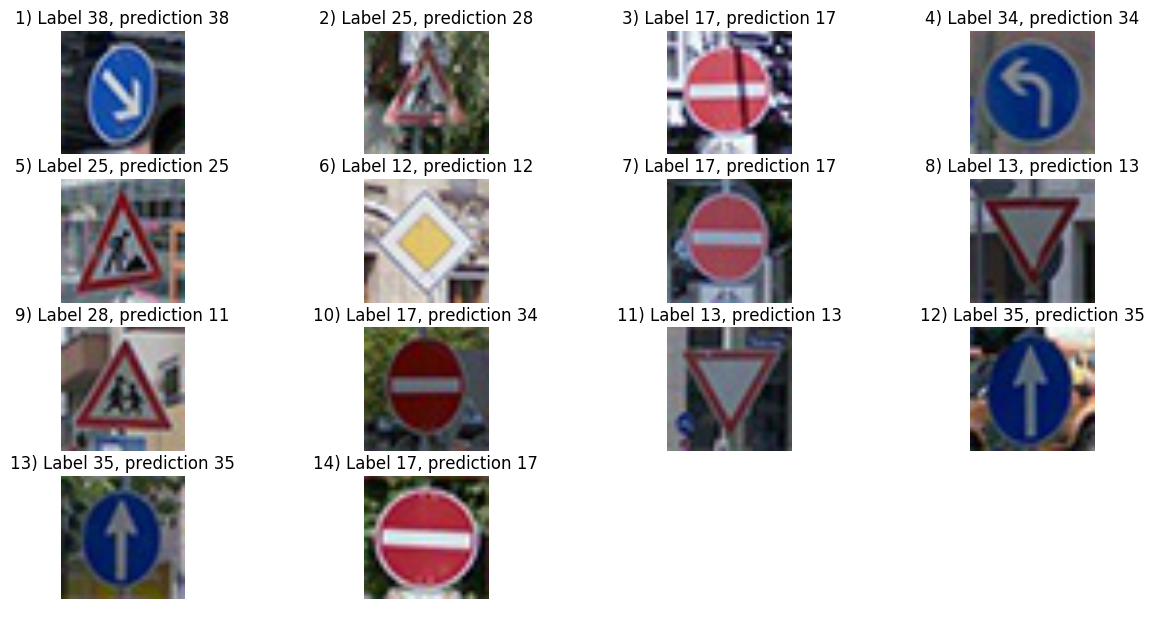

In [75]:
# Use trained network on new images
X_test = images
y_test = np.array(labels)
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    test_accuracy = evaluate(X_test, y_test)
    predictions = predict(X_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))
    
    # Plot images with correct labels and predictions
    plt.figure(1, figsize=(15, 15))
    subplot_num = 1
    for image, label, pred in zip(images, labels, predictions):
        plt.subplot(8, 4, subplot_num)
        plt.axis('off')
        plt.title("{2}) Label {0}, prediction {1}".format(label, pred, subplot_num))
        subplot_num += 1
        plt.imshow(image)
    plt.show()

### Question 6

_Choose five candidate images of traffic signs and provide them in the report. Are there any particular qualities of the image(s) that might make classification difficult? It could be helpful to plot the images in the notebook._



**Answer:**

1) Correct label: 38 (Keep right). Prediction: correct.

I thought that the skew of this sign would make prediction difficult, but the model was able to predict correctly.

2) Correct label: 25 (Road work). Prediction: 28 (Children crossing).

This sign is covered by sparse shadows from a nearby tree, which makes it difficult to read the symbol inside the white area of the sign.

3) Correct label: 17 (No entry). Prediction: correct.

Although there is a clear and harsh shadow going through the sign, the model was able to make a correct prediction.

4) Correct label: 28 (Children crossing). Prediction: 11 (Right-of-way at the next intersection).

This sign looks fairly clear to me, but the angle and size of the inner symbol could be the reason for the incorrect prediction.

5) Correct label: 17 (No entry). Prediction: 34 (Turn left ahead).

This image has relatively low contrast due to being in a shaded area. However, the prediction is of a sign of a different color (blue instead of red) and a quite different white line. This is a surprising failure.

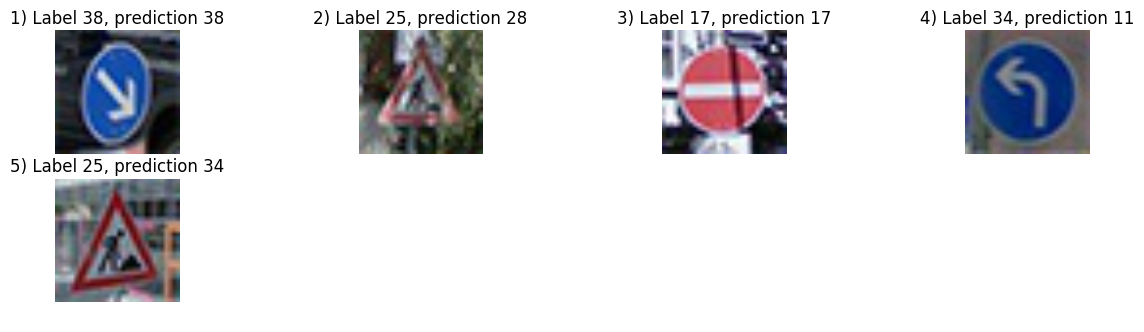

In [79]:
### Run the predictions here.
### Feel free to use as many code cells as needed.

X_test = [images[0], images[1], images[2], images[8], images[9]]
y_test = np.array([labels[0], labels[1], labels[2], labels[8], labels[9]])
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    predictions = predict(X_test, y_test)
    
    # Plot images with correct labels and predictions
    plt.figure(1, figsize=(15, 15))
    subplot_num = 1
    for image, label, pred in zip(images, labels, predictions):
        plt.subplot(8, 4, subplot_num)
        plt.axis('off')
        plt.title("{2}) Label {0}, prediction {1}".format(label, pred, subplot_num))
        subplot_num += 1
        plt.imshow(image)
    plt.show()

### Question 7

_Is your model able to perform equally well on captured pictures when compared to testing on the dataset? The simplest way to do this check the accuracy of the predictions. For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate._

_**NOTE:** You could check the accuracy manually by using `signnames.csv` (same directory). This file has a mapping from the class id (0-42) to the corresponding sign name. So, you could take the class id the model outputs, lookup the name in `signnames.csv` and see if it matches the sign from the image._


**Answer:**

Yes. In fact, it performed better on my captured pictures than the test dataset (78.6% vs 76.4%).

In [80]:
### Visualize the softmax probabilities here.
### Feel free to use as many code cells as needed.

X_test = images
y_test = np.array(labels)
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    test_accuracy = evaluate(X_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

Test Accuracy = 0.786


### Question 8

*Use the model's softmax probabilities to visualize the **certainty** of its predictions, [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. Which predictions is the model certain of? Uncertain? If the model was incorrect in its initial prediction, does the correct prediction appear in the top k? (k should be 5 at most)*

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

**Answer:**

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

In [95]:
X_test = images
y_test = np.array(labels)

prediction = tf.nn.softmax(logits)
top_five = tf.nn.top_k(prediction, k=5)

with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    print(sess.run(top_five, feed_dict={x: X_test, y: y_test}))

TopKV2(values=array([[  1.00000000e+00,   7.03254566e-10,   4.68508695e-14,
          3.35366979e-17,   7.46246780e-18],
       [  4.16825980e-01,   3.34284961e-01,   1.01096518e-01,
          7.48042241e-02,   5.22670373e-02],
       [  1.00000000e+00,   7.02138781e-12,   1.36353049e-12,
          5.95358615e-13,   4.12494915e-14],
       [  9.99994397e-01,   5.63731101e-06,   3.05431569e-09,
          1.91424487e-10,   3.10900069e-13],
       [  1.00000000e+00,   8.87978580e-10,   4.91125669e-15,
          1.12288140e-15,   7.96700979e-16],
       [  1.00000000e+00,   4.12254497e-09,   4.24587970e-16,
          2.82273763e-17,   3.58178801e-18],
       [  9.49405789e-01,   3.09048556e-02,   1.29370624e-02,
          6.72013918e-03,   2.49802397e-05],
       [  9.98592079e-01,   1.37728639e-03,   2.71168974e-05,
          2.68357462e-06,   7.34937601e-07],
       [  9.99529719e-01,   2.27758341e-04,   9.08782822e-05,
          7.30449028e-05,   5.65819428e-05],
       [  9.94763970e-0